[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/KrishnaRohithVemulapalli/Logistic-Regression/tree/blob/main/LoanEligibility/LoanEligibility.ipynb)


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [38]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

In [39]:
train = pd.read_csv('https://raw.githubusercontent.com/KrishnaRohithVemulapalli/DataSets/main/loan-train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/KrishnaRohithVemulapalli/DataSets/main/loan-test.csv')

In [40]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [42]:
train.shape, test.shape

((614, 13), (367, 12))

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [44]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [45]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
#univariate Analysis
"""
Univariate analysis is a type of statistical analysis that deals
with the examination and description of a single variable.
The primary goal of univariate analysis is to describe the main features of the data and
to summarize its characteristics using descriptive statistics. This analysis helps in understanding
the distribution and central tendency of the data, as well as identifying any patterns or anomalies.
"""

def plot_categorical_data(data, column_name):
    # Count the occurrences of each category
    value_counts = data[column_name].value_counts()
    num_categories = len(value_counts)
    colors = plt.cm.rainbow(np.linspace(0, 1, num_categories))
    # to create a list of distinct colors for visualizing data,
    bars = plt.bar(value_counts.index, value_counts.values, color=colors)

    # Customize the plot
    plt.title(f'{column_name}')
    plt.xlabel(column_name)


    # Rotate x-axis labels if there are many categories
    if len(value_counts) > 5:
        plt.xticks(rotation=45, ha='right')

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height}',
                 ha='center', va='bottom')

    # Create a legend with colored bars
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category,
                                  markerfacecolor=color, markersize=10)
                       for category, color in zip(value_counts.index, colors)]

    plt.legend(handles=legend_elements,loc='upper right', bbox_to_anchor=(1, 1))


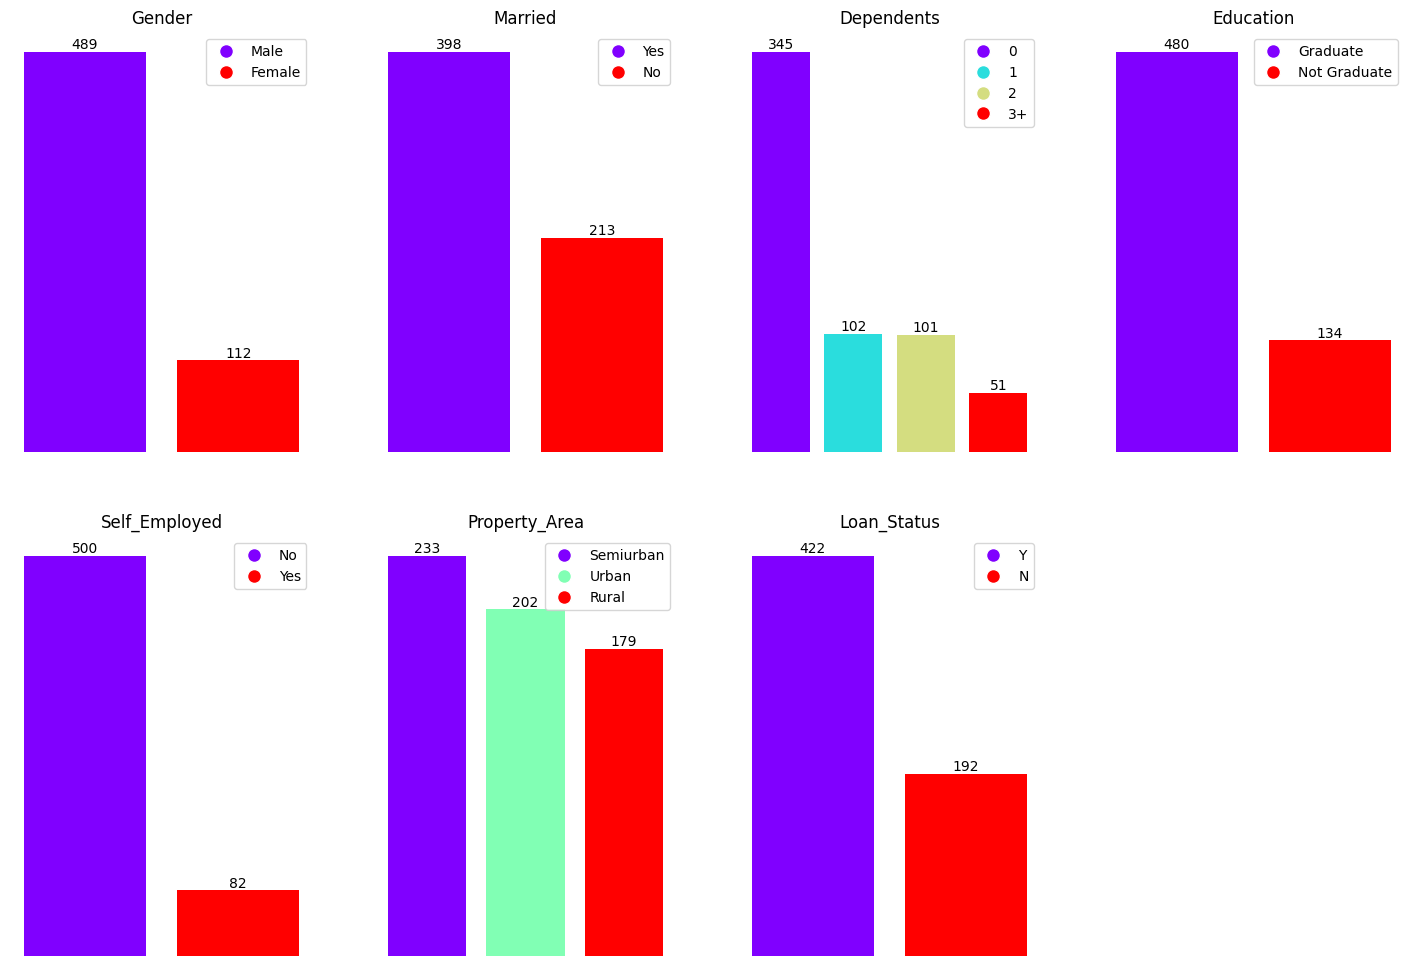

In [47]:

plt.figure(figsize=(18,12))

# function creates a grid of subplots with 2 rows and
# 4 columns, and places the current plot in the ith position.

plt.subplot(2,4,1)
plot_categorical_data(train,'Gender')
plt.axis('off')

plt.subplot(2,4,2)
plot_categorical_data(train,'Married')
plt.axis('off')

plt.subplot(2,4,3)
plot_categorical_data(train,'Dependents')
plt.axis('off')

plt.subplot(2,4,4)
plot_categorical_data(train,'Education')
plt.axis('off')

plt.subplot(2,4,5)
plot_categorical_data(train,'Self_Employed')
plt.axis('off')

plt.subplot(2,4,6)
plot_categorical_data(train,'Property_Area')
plt.axis('off')

plt.subplot(2,4,7)
plot_categorical_data(train,'Loan_Status')
plt.axis('off')

plt.show()

<ipython-input-48-ca9fa76fd86c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome'])
<ipython-input-48-ca9fa76fd86c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['CoapplicantIncome'])
<ipython-input-48-ca9fa76fd86c>:11: UserWarning: 

`distplot` is a deprecated fu

Text(0.5, 1.0, 'Credit_History')

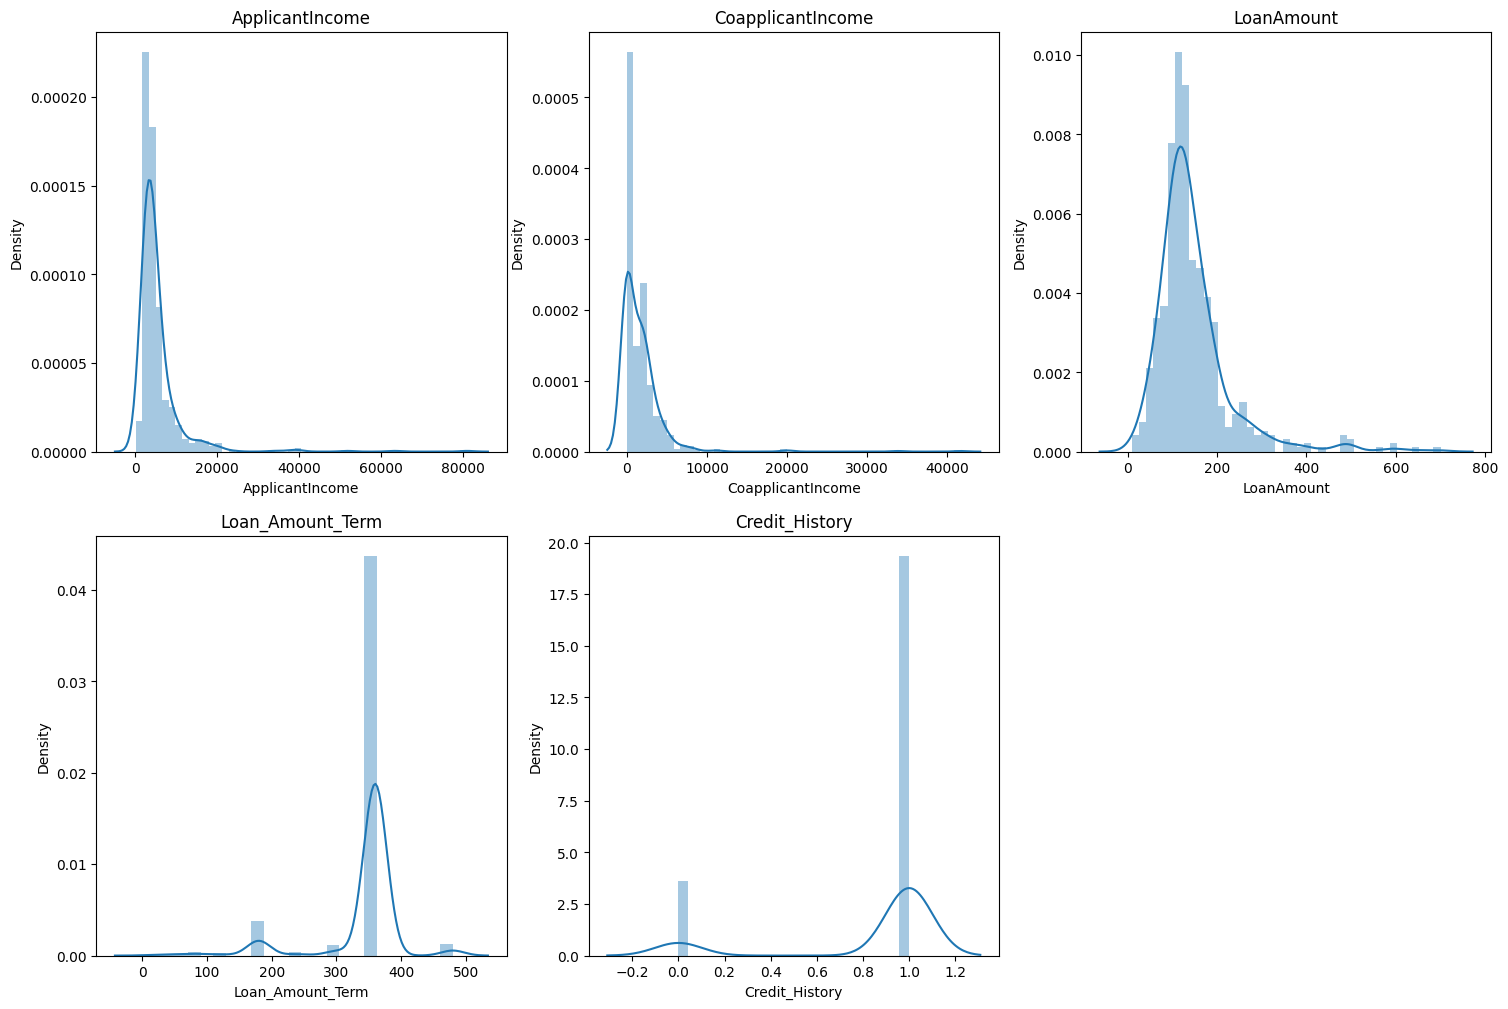

In [48]:
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
sns.distplot(train['ApplicantIncome'])
plt.title('ApplicantIncome')

plt.subplot(2,3,2)
sns.distplot(train['CoapplicantIncome'])
plt.title('CoapplicantIncome')

plt.subplot(2,3,3)
sns.distplot(train['LoanAmount'])
plt.title('LoanAmount')

plt.subplot(2,3,4)
sns.distplot(train['Loan_Amount_Term'])
plt.title('Loan_Amount_Term')

plt.subplot(2,3,5)
sns.distplot(train['Credit_History'])
plt.title('Credit_History')

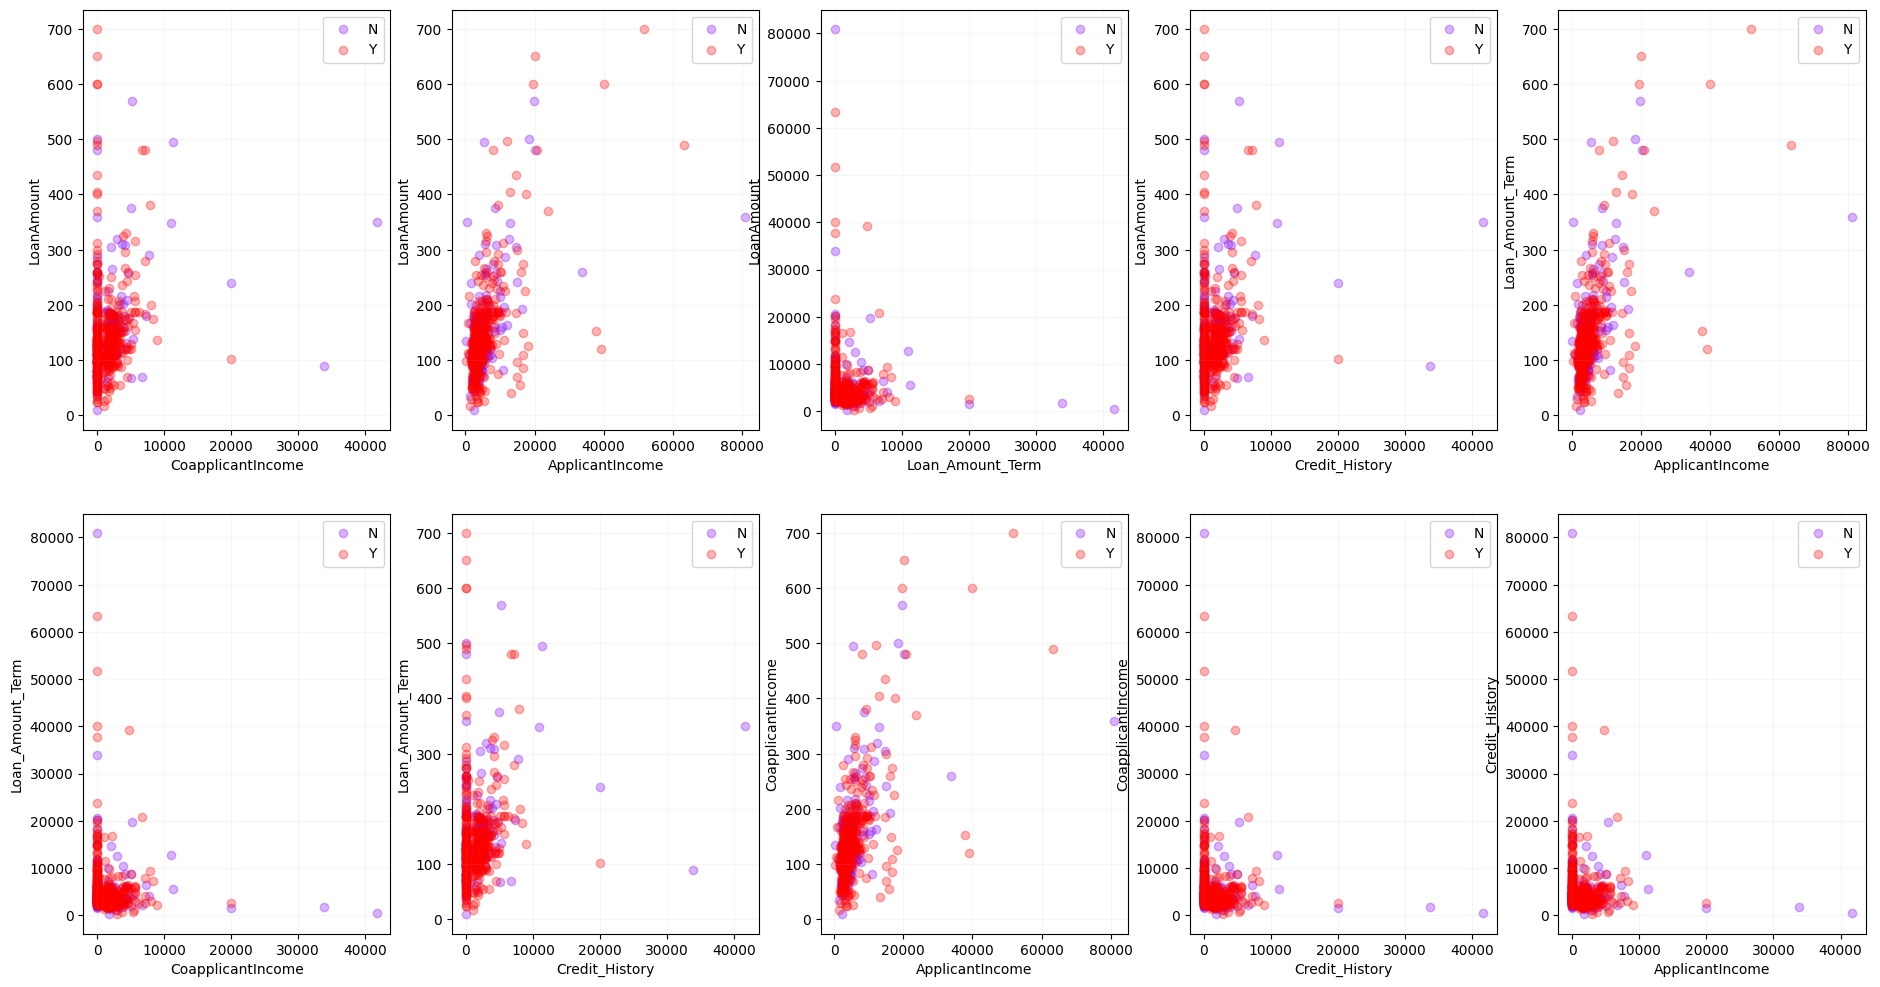

In [49]:
#Bi variate analysis
def scatter_plot_with_labels(x, y, labels,feature1,feature2):
    # Create a color map
    unique_labels = np.unique(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

    # Create the scatter plot
    for label, color in zip(unique_labels, colors):
        mask = labels == label
        plt.scatter(x[mask], y[mask], c=[color], label=label, alpha=0.3)

    plt.xlabel(f'{feature1}')
    plt.ylabel(f'{feature2}')
    plt.legend()
    plt.grid(True, alpha=0.1)



plt.figure(figsize=(23,12))

plt.subplot(2,5,1)
scatter_plot_with_labels(train['CoapplicantIncome'],train['LoanAmount'],train['Loan_Status'],'CoapplicantIncome','LoanAmount')
plt.subplot(2,5,2)
scatter_plot_with_labels(train['ApplicantIncome'],train['LoanAmount'],train['Loan_Status'],'ApplicantIncome','LoanAmount')
plt.subplot(2,5,3)
scatter_plot_with_labels(train['CoapplicantIncome'],train['ApplicantIncome'],train['Loan_Status'],'Loan_Amount_Term','LoanAmount')
plt.subplot(2,5,4)
scatter_plot_with_labels(train['CoapplicantIncome'],train['LoanAmount'],train['Loan_Status'],'Credit_History','LoanAmount')
plt.subplot(2,5,5)
scatter_plot_with_labels(train['ApplicantIncome'],train['LoanAmount'],train['Loan_Status'],'ApplicantIncome','Loan_Amount_Term')
plt.subplot(2,5,6)
scatter_plot_with_labels(train['CoapplicantIncome'],train['ApplicantIncome'],train['Loan_Status'],'CoapplicantIncome','Loan_Amount_Term')
plt.subplot(2,5,7)
scatter_plot_with_labels(train['CoapplicantIncome'],train['LoanAmount'],train['Loan_Status'],'Credit_History','Loan_Amount_Term')
plt.subplot(2,5,8)
scatter_plot_with_labels(train['ApplicantIncome'],train['LoanAmount'],train['Loan_Status'],'ApplicantIncome','CoapplicantIncome')
plt.subplot(2,5,9)
scatter_plot_with_labels(train['CoapplicantIncome'],train['ApplicantIncome'],train['Loan_Status'],'Credit_History','CoapplicantIncome')
plt.subplot(2,5,10)
scatter_plot_with_labels(train['CoapplicantIncome'],train['ApplicantIncome'],train['Loan_Status'],'ApplicantIncome','Credit_History')

plt.show()

<ipython-input-50-008f5b492a21>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Loan_Status', x=col, data=train, ax=axes[i], palette='Set3', orient='h',fliersize=3)
<ipython-input-50-008f5b492a21>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Loan_Status', x=col, data=train, ax=axes[i], palette='Set3', orient='h',fliersize=3)
<ipython-input-50-008f5b492a21>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Loan_Status', x=col, data=train, ax=axes[i], palette='Set3', orient='h',fliersize=3)
<ipython-input-50-008f5b492a21>:11: F

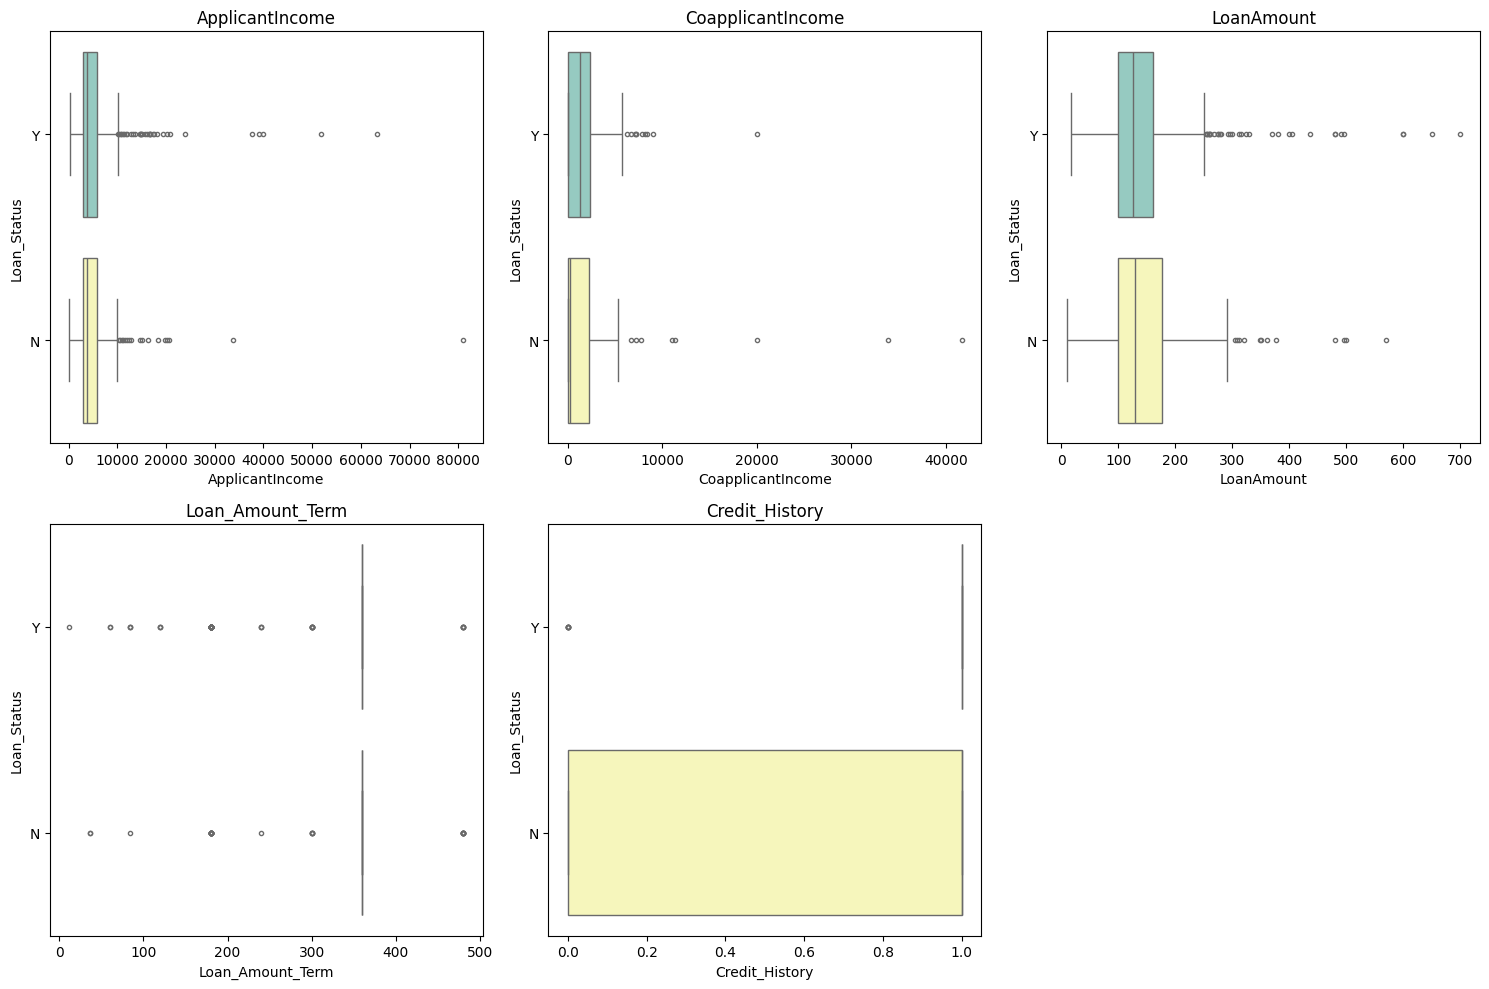

In [50]:
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if col != 'Loan_Status']

n_cols = 3
n_rows = (len(numerical_columns) - 1) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Create boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(y='Loan_Status', x=col, data=train, ax=axes[i], palette='Set3', orient='h',fliersize=3)
    axes[i].set_title(col)
#     axes[i].set_xlabel('Loan_Status')
#     axes[i].set_ylabel(col)

# Remove any unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [51]:
df=train.copy()
df['Gender'] = df['Gender'].fillna(value='Not Known')
df['Married'] = df['Married'].fillna(value='Not Specified')
df['Dependents'] = df['Dependents'].fillna(value='Unknown')
df['Self_Employed'] = df['Self_Employed'].fillna(value='Not Specified')
df['LoanAmount'] = df['LoanAmount'].fillna(value=df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(value=df['Credit_History'].median())

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [52]:
one_hot_encoder = OneHotEncoder(drop='first',dtype=np.int64,sparse=False, handle_unknown='ignore')
ordinal_encoder = OrdinalEncoder(dtype=np.int64)

In [53]:
df['Married']=ordinal_encoder.fit_transform(np.array(df['Married']).reshape(-1,1))
df['Dependents']=ordinal_encoder.fit_transform(np.array(df['Dependents']).reshape(-1,1))
df['Education']=ordinal_encoder.fit_transform(np.array(df['Education']).reshape(-1,1))
df['Self_Employed']=ordinal_encoder.fit_transform(np.array(df['Self_Employed']).reshape(-1,1))
df['Loan_Status']=ordinal_encoder.fit_transform(np.array(df['Loan_Status']).reshape(-1,1))

In [54]:
encoded_data = one_hot_encoder.fit_transform(df[['Gender', 'Property_Area']])
feature_names = one_hot_encoder.get_feature_names_out(['Gender', 'Property_Area'])
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)
df = df.drop(['Gender', 'Property_Area'], axis=1)
df = pd.concat([df, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
df

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Gender_Not Known,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,1,0,0,1
1,LP001003,2,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0
2,LP001005,2,0,0,2,3000,0.0,66.0,360.0,1.0,1,1,0,0,1
3,LP001006,2,0,1,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,1
4,LP001008,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,2900,0.0,71.0,360.0,1.0,1,0,0,0,0
610,LP002979,2,3,0,0,4106,0.0,40.0,180.0,1.0,1,1,0,0,0
611,LP002983,2,1,0,0,8072,240.0,253.0,360.0,1.0,1,1,0,0,1
612,LP002984,2,2,0,0,7583,0.0,187.0,360.0,1.0,1,1,0,0,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Married                  614 non-null    int64  
 2   Dependents               614 non-null    int64  
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    int64  
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    int64  
 11  Gender_Male              614 non-null    int64  
 12  Gender_Not Known         614 non-null    int64  
 13  Property_Area_Semiurban  614 non-null    int64  
 14  Property_Area_Urban      6

In [57]:
df.corr(numeric_only=True)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Gender_Not Known,Property_Area_Semiurban,Property_Area_Urban
Married,1.000000,0.301692,0.015032,-0.007518,0.051087,0.078435,0.146523,-0.102423,0.008834,0.088109,0.338831,0.036678,0.002811,0.000499
Dependents,0.301692,1.000000,0.060466,0.039636,0.103416,0.011146,0.128868,-0.075159,-0.082888,-0.007318,0.134578,0.030857,0.005424,0.024496
Education,0.015032,0.060466,1.000000,-0.015722,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.085884,0.061497,-0.050318,-0.039410,-0.034279
Self_Employed,-0.007518,0.039636,-0.015722,1.000000,0.129957,0.008240,0.118883,-0.038692,0.022669,0.001463,-0.035436,0.062583,-0.001822,-0.022323
ApplicantIncome,0.051087,0.103416,-0.140760,0.129957,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.004710,0.013933,0.118787,-0.014246,-0.000598
CoapplicantIncome,0.078435,0.011146,-0.062290,0.008240,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.059187,0.082316,-0.007825,-0.027044,0.022776
LoanAmount,0.146523,0.128868,-0.168759,0.118883,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.033214,0.063245,0.109880,-0.005804,-0.036050
Loan_Amount_Term,-0.102423,-0.075159,-0.073928,-0.038692,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.022549,-0.070288,-0.001992,0.059141,-0.094279
Credit_History,0.008834,-0.082888,-0.073658,0.022669,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.540556,0.021612,-0.035851,0.035976,-0.016934
Loan_Status,0.088109,-0.007318,-0.085884,0.001463,-0.004710,-0.059187,-0.033214,-0.022549,0.540556,1.000000,0.025407,-0.022814,0.136540,-0.043621


In [60]:
X=df.drop(columns=['Loan_Status','Loan_ID'])
y=df['Loan_Status']

In [61]:
scaler = StandardScaler()
columns=X.columns
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=columns)
X

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_Not Known,Property_Area_Semiurban,Property_Area_Urban
0,-1.368405,-0.752060,-0.528362,-0.458646,0.072991,-0.554487,-0.211241,0.273231,0.411733,0.505592,-0.147074,-0.782016,1.428147
1,0.734726,0.141102,-0.528362,-0.458646,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0.505592,-0.147074,-0.782016,-0.700208
2,0.734726,-0.752060,-0.528362,2.414909,-0.393747,-0.554487,-0.948996,0.273231,0.411733,0.505592,-0.147074,-0.782016,1.428147
3,0.734726,-0.752060,1.892641,-0.458646,-0.462062,0.251980,-0.306435,0.273231,0.411733,0.505592,-0.147074,-0.782016,1.428147
4,-1.368405,-0.752060,-0.528362,-0.458646,0.097728,-0.554487,-0.056551,0.273231,0.411733,0.505592,-0.147074,-0.782016,1.428147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-1.368405,-0.752060,-0.528362,-0.458646,-0.410130,-0.554487,-0.889500,0.273231,0.411733,-1.977878,-0.147074,-0.782016,-0.700208
610,0.734726,1.927426,-0.528362,-0.458646,-0.212557,-0.554487,-1.258378,-2.522836,0.411733,0.505592,-0.147074,-0.782016,-0.700208
611,0.734726,0.141102,-0.528362,-0.458646,0.437174,-0.472404,1.276168,0.273231,0.411733,0.505592,-0.147074,-0.782016,1.428147
612,0.734726,1.034264,-0.528362,-0.458646,0.357064,-0.554487,0.490816,0.273231,0.411733,0.505592,-0.147074,-0.782016,1.428147


<Axes: >

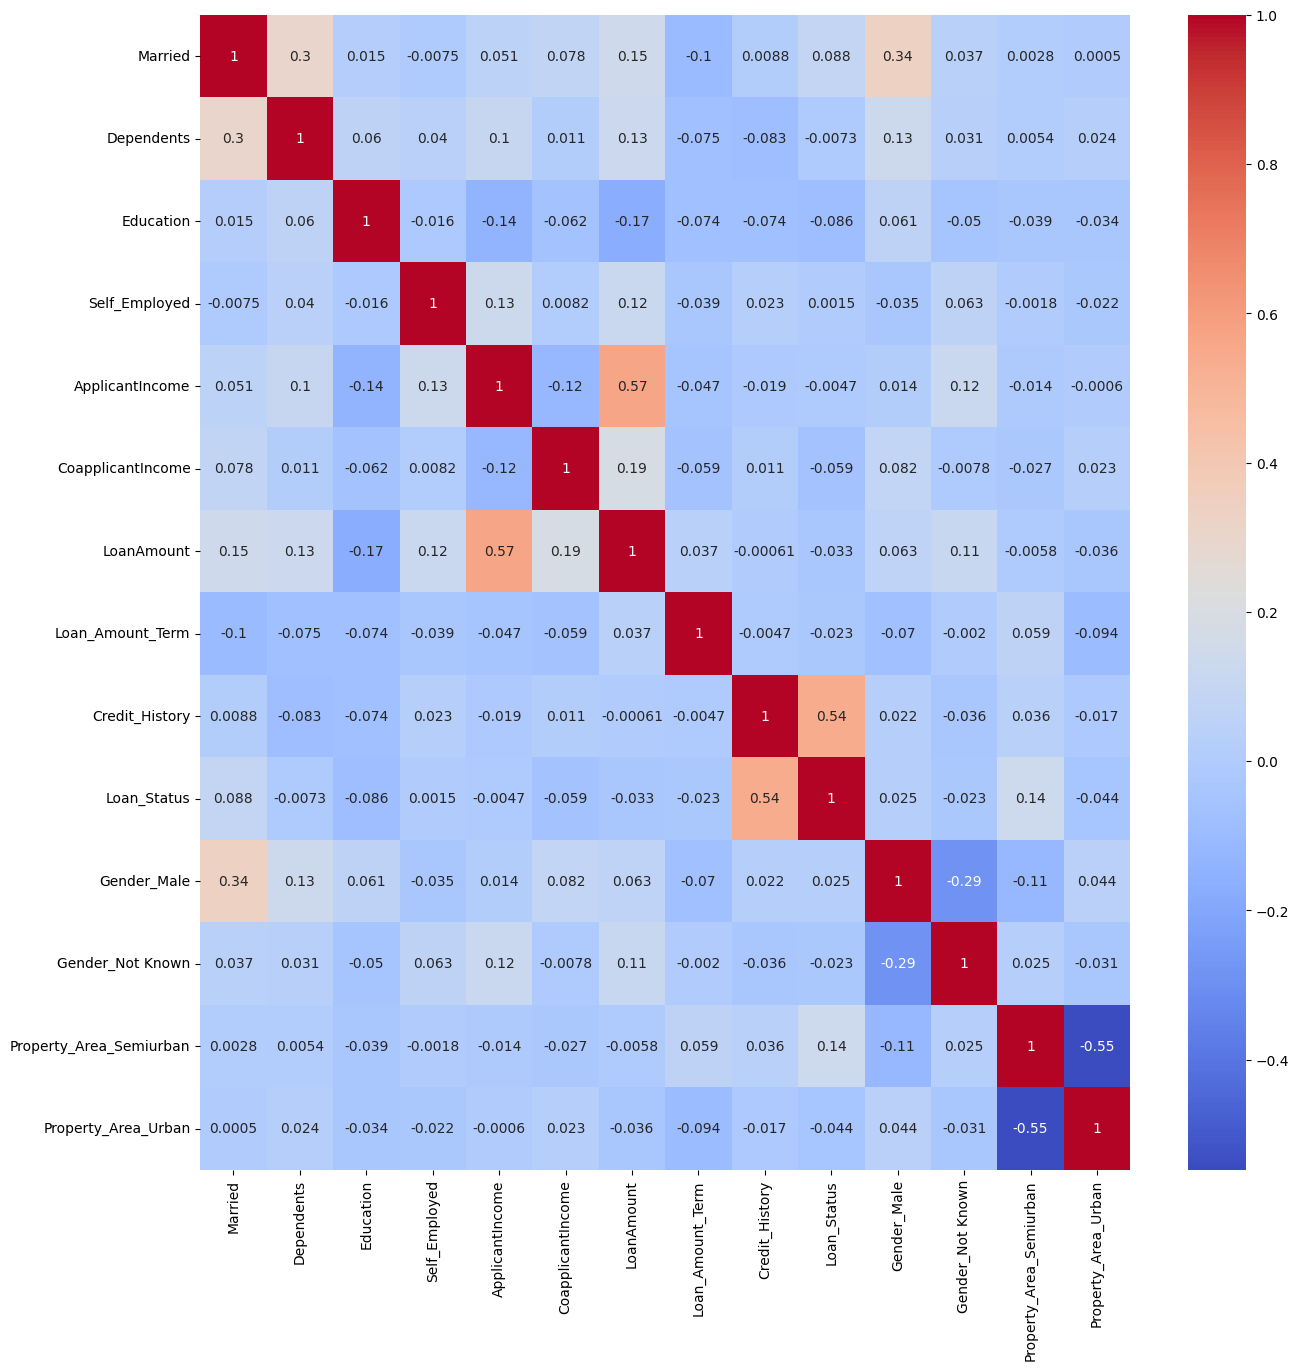

In [65]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
#

In [66]:
X=X.drop(['LoanAmount','Gender_Not Known','Loan_Amount_Term','Dependents','ApplicantIncome','Self_Employed','Gender_Male'],axis=1)

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logistic_reg = LogisticRegression()

# Fit the model on the training data
logistic_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

